导入模块

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
%matplotlib inline

# 数据降噪方法

## 小波分析--傅里叶变换

基于一种思想:所有的复杂的波可以看成是简单的波的复合,把一些复杂的数据(通常是时间序列的)看成波,然后进行傅里叶变换,将时域信号变化到频域.

然后便可在频域处理信号,将噪声的波删去(一般来说,噪声的频率与主频不一致,且振幅较小),再进行傅里叶逆变换,即可得到降噪后的数据

### 案例

对于一个信号y = $10\sin(x)$,加上高频噪声y = $\sin(5x)$, y=0.5 $\sin(10x)$,对加上噪声后的信号进行降噪

Text(0.5, 1.0, '有噪声')

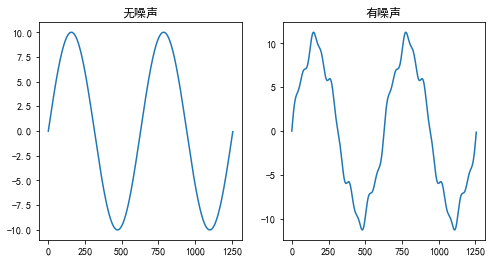

In [10]:
plt.figure(figsize=(8,4))

x = np.arange(0,4*np.pi,0.01)
y = 10*np.sin(x)
y_noise = y+np.sin(5*x)+0.5*np.sin(10*x)

# 未加噪声
plt.subplot(121)
plt.plot(y)
plt.title('无噪声')

# 加上噪声
plt.subplot(122)
plt.plot(y_noise)
plt.title('有噪声')


进行FFT

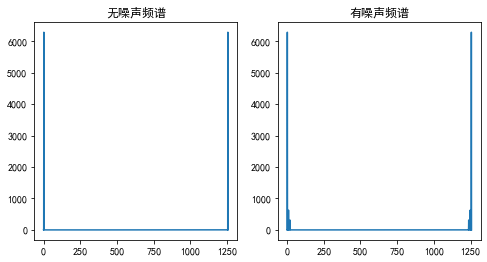

In [14]:
dft_noise = np.fft.fft(y_noise)
dft = np.fft.fft(y)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('无噪声频谱')
plt.plot(abs(dft))

plt.subplot(122)
plt.title('有噪声频谱')
plt.plot(abs(dft_noise))

对有噪声数据进行降噪

Text(0.5, 1.0, '降噪后的频谱')

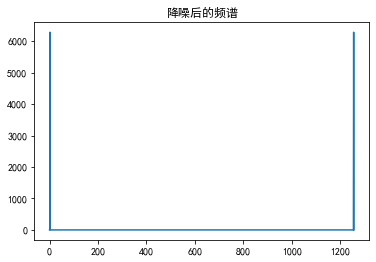

In [17]:
avg = np.max(abs(dft_noise)) * 0.3 # 设置降噪阈值
dft_noise[np.where(abs(dft_noise)<=avg)] = 0
plt.plot(abs(dft_noise))
plt.title('降噪后的频谱')

IFFT还原

c:\Users\xun\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '降噪后的波形')

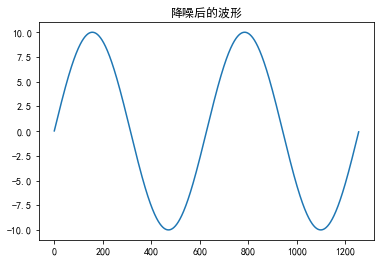

In [18]:
idft = np.fft.ifft(dft_noise)
plt.plot(idft)
plt.title('降噪后的波形')

由此可见,成功达到降噪的目的